In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyfiles.setup as pkg

In [2]:
N = 10
data = pkg.makephase(N)

In [ ]:

# Simple examples for 10x10 phase diagram
resloc1 = np.array([[1,2,1],
                    [2,5,-1],
                    [2,7,1],
                    [4,4,-1],
                    [8,2,1],
                    [7,6,-1],
                    [8,8,1],])
resloc2 = np.array([[6,2,1],
                    [5,3,1],
                    [4,4,1],
                    [4,5,-1],
                    [5,6,-1],
                    [6,7,-1],])
resloc3 = np.array([[7,2,1],
                    [7,4,1],
                    [7,6,-1],
                    [4,7,1],
                    [1,8,-1],
                    [2,2,1],])

data1_res = pkg.add_residues(data, resloc1)
data2_res = pkg.add_residues(data, resloc2)
data3_res = pkg.add_residues(data, resloc3)

data1_wrap = pkg.wrap(data1_res)
data_wrap = pkg.wrap(data)

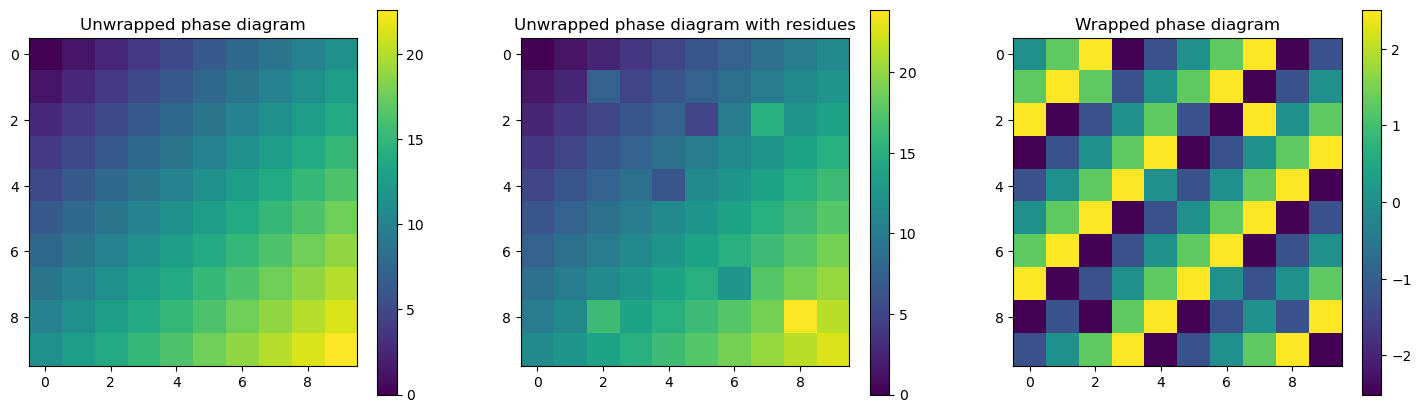

In [4]:
fig, ax = plt.subplots(1,3, figsize=(18,5))
image = ax[0].imshow(data)
ax[0].set_title('Unwrapped phase diagram')
plt.colorbar(image, ax=ax[0])
image = ax[1].imshow(data1_res)
ax[1].set_title('Unwrapped phase diagram with residues')
plt.colorbar(image, ax=ax[1])
image = ax[2].imshow(data1_wrap)
ax[2].set_title('Wrapped phase diagram')
plt.colorbar(image, ax=ax[2])
plt.show()

In [ ]:
res_map = pkg.find_residues(data1_wrap)
print(res_map)

[[ 0  0  1  0  0  0  0  0  0]
 [ 0 -1  0  0  0  1  0  1  0]
 [ 0  0  0  0 -1  0 -1  0  0]
 [ 0  0  0  0  1  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  0]
 [ 0  0  1  0  0 -1  0  0  1]
 [ 0 -1  0  0  0  0  0 -1  0]]


In [1]:
import pyfiles.setup as pkg
import matplotlib.pyplot as plt

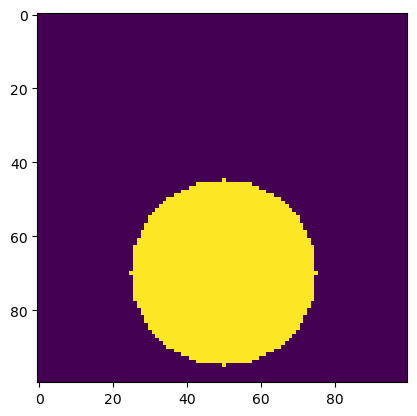

In [4]:
N = 100
mask = pkg.create_mask([N,N],loc=[0.5,0.7], shape=3, percent=True)

fig, ax = plt.subplots()
ax.imshow(mask)